### Proyecto caso 4

El propósito de este proyecto es facilitar el uso de sklearn en términos generales, en este caso solo permite modificar un poco la base de datos, eliminando las columnas que se consideren innecesarias segun la matriz de Pearson.

El objetivo a largo plazo es escoger varios métodos de sklearn con la base modificada e ir probando cual entrega mejores resultados, en este caso, solo se entrena con K_means modificando las variables basicas y muestra la matriz de confusion en cada uno de los resultados para mostrar detalles.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [ ]:
database = pd.read_csv('Cellphone.csv', sep=';')

database["DataUsage"] = database.DataUsage.astype(str)
database['DataUsage'] = database['DataUsage'].apply(lambda x: str(x.replace(',','.')))
database["DataUsage"] = database.DataUsage.astype(float)

database["DayMins"] = database.DayMins.astype(str)
database['DayMins'] = database['DayMins'].apply(lambda x: str(x.replace(',','.')))
database['DayMins'] = database.DayMins.astype(float)

database["MonthlyCharge"] = database.MonthlyCharge.astype(str)
database['MonthlyCharge'] = database['MonthlyCharge'].apply(lambda x: str(x.replace(',','.')))
database["MonthlyCharge"] = database.MonthlyCharge.astype(float)

database["AverageFee"] = database.AverageFee.astype(str)
database['AverageFee'] = database['AverageFee'].apply(lambda x: str(x.replace(',','.')))
database["AverageFee"] = database.AverageFee.astype(float)

database["RoamMins"] = database.RoamMins.astype(str)
database['RoamMins'] = database['RoamMins'].apply(lambda x: str(x.replace(',','.')))
database["RoamMins"] = database.RoamMins.astype(float)

database["DayCalls"] = database.DayCalls.astype(str)
database['DayCalls'] = database['DayCalls'].apply(lambda x: str(x.replace(',','.')))
database["DayCalls"] = database.DayCalls.astype(float)

database = database.fillna(database.mean())

In [ ]:
def column_delete(df):
    print('Cual columna desea eliminar? \n')
    cols = df.columns
    i = 0
    for col in df.columns:
        print(f'{i} - {col}')
        i = i + 1
    try:
        target = int(input('\n Escriba el numero de la columna que desea eliminar, cualquier valor extra para salir.'))
    except:
        return df
    df.drop(df.columns[target], axis=1, inplace=True)
    column_delete(df)

def column_y(df):
    print('Selecciona la columna Y, estas son las columnas de su base de datos\n')
    i = 0
    for col in database.columns:
        print(f'{i} - {col}')
        i = i + 1
    op_2 = int(input())
    y = df.iloc[:, op_2]
    X = df
    X.drop(X.columns[op_2], axis=1, inplace=True)
    return X, y

def pearson(df):
    plt.figure(figsize=(14,12))
    plt.title('Correlacion de pearson', size = 15)
    colormap = sns.diverging_palette(10, 220, as_cmap = True)
    sns.heatmap(df.corr(),
                square = True,
                annot = True,
                linewidths=0.1,vmax=1.0, linecolor='white',
                annot_kws={'fontsize':12 })
    plt.show()

def analisis(X_train, X_test, y_train, y_test,n):
    results = cross_validate(KNeighborsRegressor(),X,y,return_train_score=True,cv=5)
    print(results)
    print('')
    train_scores, test_scores = validation_curve(KNeighborsRegressor(),
                                             X,
                                             y,
                                             param_name='n_neighbors',
                                             param_range=n,
                                             cv=5)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    k_range = n
    scores_train = []
    scores_test = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train, y_train)
        scores_train.append(round(knn.score(X_train, y_train),3))
        scores_test.append(round(knn.score(X_test, y_test),3))
        print(f'Prueba con un valor de n de {k}')
        print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
        print('Accuracy of K-NN classifier on test set: {:.2f} \n'.format(knn.score(X_test, y_test)))

    print(f'Puntajes en base al conjunto de entrenamiento{scores_train}\n')
    print(f'Puntajes en base al conjunto de prueba{scores_test}\n')

    plt.figure()
    plt.xlabel('k')
    plt.ylabel('accuracy')
    plt.scatter(k_range, scores_test)
    plt.xticks(k_range)
    
    max_value = max(scores_train)
    max_index = scores_train.index(max_value)
    print(f'El puntaje {max_value} en "Conjunto de entrenamiento" corresponde al valor k =  {max_index + 1} .')
    
    max_value = max(scores_test)
    max_index = scores_test.index(max_value)
    print(f'El puntaje {max_value} en "Conjunto de prueba" corresponde al valor k =  {max_index + 1} .')


Agregue el minimo de K: 
1
Agregue el maximo de K: 
15
{'fit_time': array([0.0030086 , 0.00300717, 0.00198793, 0.00300717, 0.00301409]), 'score_time': array([0.00301456, 0.00200677, 0.00201344, 0.00200057, 0.00198722]), 'test_score': array([-0.23360555,  0.20710791,  0.19348027,  0.05581053,  0.15556694]), 'train_score': array([0.48671865, 0.47340733, 0.46782705, 0.46923099, 0.46181091])}

Prueba con un valor de n de 1
Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.80 

Prueba con un valor de n de 2
Accuracy of K-NN classifier on training set: 0.90
Accuracy of K-NN classifier on test set: 0.83 

Prueba con un valor de n de 3
Accuracy of K-NN classifier on training set: 0.90
Accuracy of K-NN classifier on test set: 0.84 

Prueba con un valor de n de 4
Accuracy of K-NN classifier on training set: 0.89
Accuracy of K-NN classifier on test set: 0.84 

Prueba con un valor de n de 5
Accuracy of K-NN classifier on training set: 0.88
Accuracy of K-N

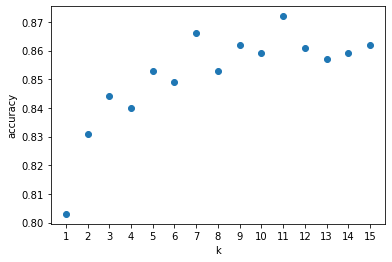

In [ ]:
print('Bienvenido')
print('Estas son las columnas de su base de datos \n')
for col in database.columns:
    print(col)
print('''\n Que desea hacer?
          1 - Eliminar columnas
          any - Continuar''')

pearson(database) # objetivo: es eliminar todas las columnas que segun la matriz de Pearson no sean relevantes para "Cancelar"

# Eliminar todas las columnas innecesarias, en este caso, 11, 10, 8, 7, 4, 3 y 1 {Este paso se puede automatizar}
op_1 = input()
if op_1 == '1':
    column_delete(database)
    
# Clear_output es para evitar que la consola se llene.
clear_output(wait=True)

# Seleccion de eje Y
X, y = column_y(database)

clear_output(wait=True)

# Seleccion del minimo K y maximo K
a = int(input('Agregue el minimo de K: \n'))
b = int(input('Agregue el maximo de K: \n'))
n = np.arange(a,b+1)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)
analisis(X_train, X_test, y_train, y_test, n)